Importing Dependencies

In [1]:
# Data Handling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Hiding warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
# fetching dataset
wine = pd.read_csv('./datasets/old/WineQT.csv')

In [3]:
wine.shape

(1143, 13)

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
# checking any missing values
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Exploratory Data Analysis

In [6]:
# statistical measures of the dataset
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [7]:
wine_new = wine.drop('Id', axis = 1)  # Dropping 'Id' column

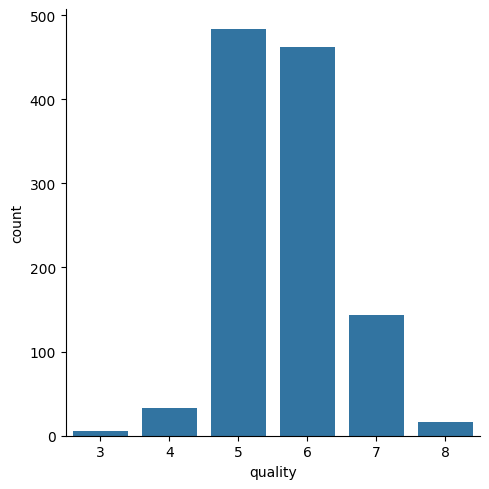

In [8]:
# num of values for each quality
import seaborn as sns

sns.catplot(x = 'quality', data = wine_new, kind = 'count')

Comparing each attribute to quality attribute

<Axes: xlabel='quality', ylabel='fixed acidity'>

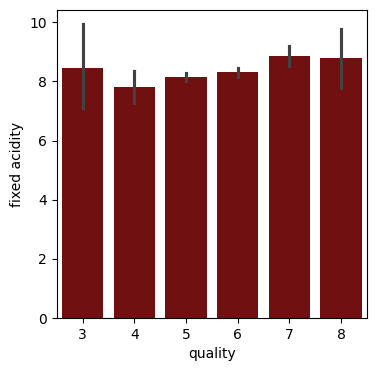

In [9]:
# volatile acidity vs quality
plot = plt.figure(figsize=(4,4))
sns.barplot(x='quality', y='fixed acidity', data = wine_new, color="maroon")

<Axes: xlabel='quality', ylabel='volatile acidity'>

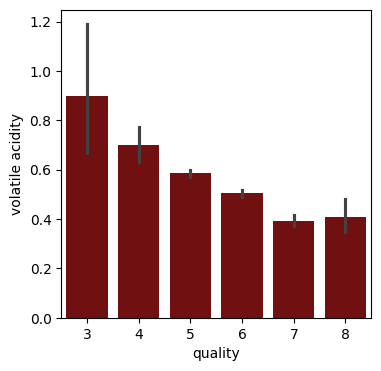

In [10]:
# volatile acidity vs quality
plot = plt.figure(figsize=(4,4))
sns.barplot(x='quality', y='volatile acidity', data = wine_new, color="maroon")

<Axes: xlabel='quality', ylabel='citric acid'>

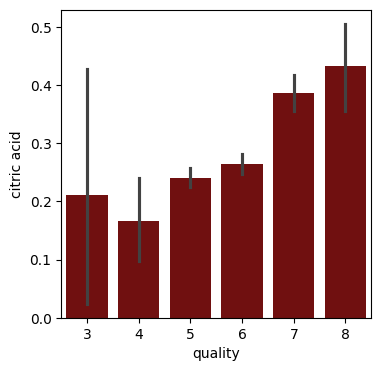

In [11]:
# citric acid vs quality
plot = plt.figure(figsize=(4,4))
sns.barplot(x='quality', y='citric acid', data = wine_new, color="maroon")

<Axes: xlabel='quality', ylabel='residual sugar'>

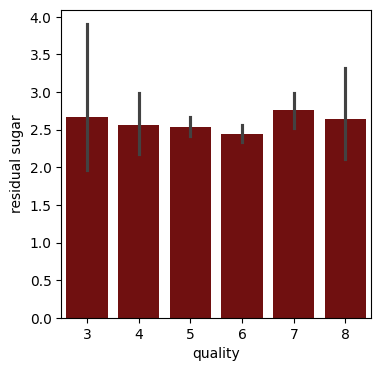

In [12]:
# residual sugar vs quality
plot = plt.figure(figsize=(4,4))
sns.barplot(x='quality', y='residual sugar', data = wine_new, color="maroon")

<Axes: xlabel='quality', ylabel='chlorides'>

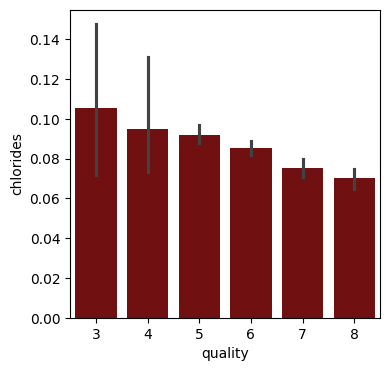

In [13]:
# chlorides vs quality
plot = plt.figure(figsize=(4,4))
sns.barplot(x='quality', y='chlorides', data = wine_new, color="maroon")

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

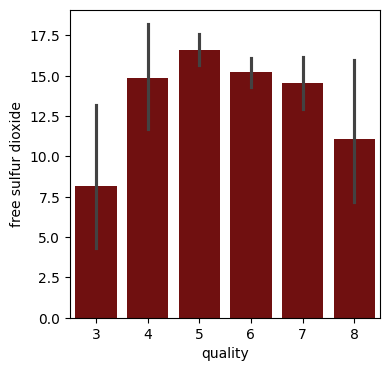

In [14]:
# free sulfur dioxide vs quality
plot = plt.figure(figsize=(4,4))
sns.barplot(x='quality', y='free sulfur dioxide', data = wine_new, color="maroon")

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

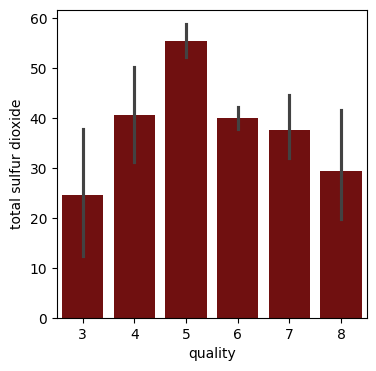

In [15]:
# total sulfur dioxide vs quality
plot = plt.figure(figsize=(4,4))
sns.barplot(x='quality', y='total sulfur dioxide', data = wine_new, color="maroon")

<Axes: xlabel='quality', ylabel='density'>

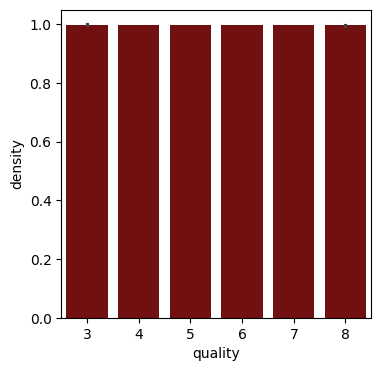

In [16]:
# density vs quality
plot = plt.figure(figsize=(4,4))
sns.barplot(x='quality', y='density', data = wine_new, color="maroon")

<Axes: xlabel='quality', ylabel='pH'>

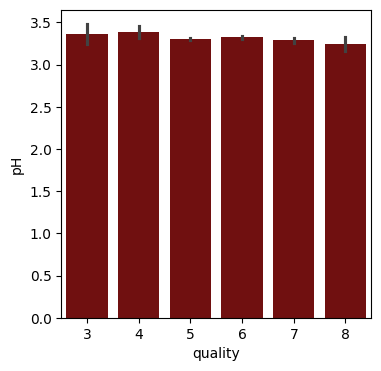

In [17]:
# pH vs quality
plot = plt.figure(figsize=(4,4))
sns.barplot(x='quality', y='pH', data = wine_new, color="maroon")

<Axes: xlabel='quality', ylabel='sulphates'>

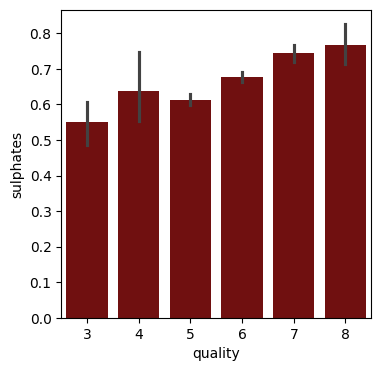

In [18]:
# sulphates vs quality
plot = plt.figure(figsize=(4,4))
sns.barplot(x='quality', y='sulphates', data = wine_new, color="maroon")

<Axes: xlabel='quality', ylabel='alcohol'>

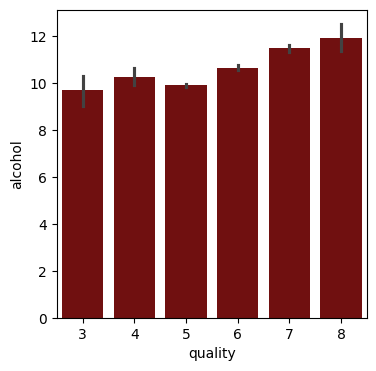

In [19]:
# alcohol vs quality
plot = plt.figure(figsize=(4,4))
sns.barplot(x='quality', y='alcohol', data = wine_new, color="maroon")

Correlation

In [20]:
correlation = wine_new.corr()

<Axes: >

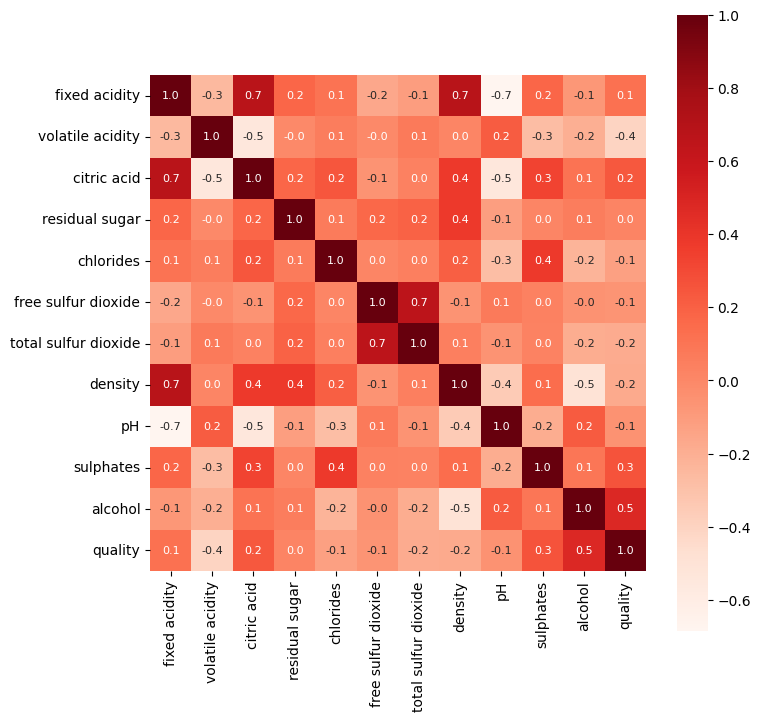

In [21]:
# constructing a heatmap to understand the correlation between columns
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')

Data Preprocessing

In [22]:
# separate the quality attribute to the other attributes
X = wine_new.drop('quality', axis=1)

print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

Label Binarization

In [23]:
Y = wine_new['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)

print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: quality, Length: 1143, dtype: int64


Train & Test Split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [25]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1143,) (914,) (229,)


Train Model: Random Forest Classifier

In [26]:
model = RandomForestClassifier()

In [27]:
model.fit(X_train, Y_train)

RandomForestClassifier()

Model Evaluation

In [28]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [29]:
print('Accuracy: ', test_data_accuracy)

Accuracy:  0.9039301310043668


In [30]:
import pickle

In [31]:
# with open('C:/xampp/htdocs/itd105_ml_algo/itd105_app/MLmodels/wine_model.pkl', 'wb') as file:
#     pickle.dump(model, file)


Building a Predicting System

In [32]:
# input_data = (6.6,0.705,0.07,1.6,0.076,6.0,15.0,0.9962,3.44,0.58,10.7)

# # test
# input_data_numpy_array = np.asarray(input_data)

# # reshape data
# input_data_reshaped = input_data_numpy_array.reshape(1, -1)

# wine_prediction = model.predict(input_data_reshaped)

# print(wine_prediction)

# if wine_prediction[0]==1:
#   print('Nicely done! All of your suggested inputs are well-balanced for making a fine wine product.')
# else:
#   print('Sorry, but some of your suggested inputs are not recommendable to make a fine wine product. Please do consider necessary adjustments.')

In [33]:
# # Export csv file
# wine_new.to_csv('cleaned_wine-data.csv', index=False)